Dylan Rohan - a1844790

Assessment 3: Case Study Report
***

# Predicting Customer Behaviour with Personality Psychology 

Inspiration:

1. Personality Psycholgy - https://www.alieward.com/ologies/personalitypsychology
1. The role of business in society: https://www.hks.harvard.edu/sites/default/files/centers/mrcbg/programs/cri/files/report_12_CGI%2BRole%2Bof%2BBusiness%2Bin%2BSociety%2BReport%2BFINAL%2B10-03-06.pdf

All code below has been written by myself, the ideas have been sourced in the report.

### Experience

In [1]:
# Importing Modules
## Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette("colorblind")

## Data preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

## Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from kmodes.kmodes import KModes

## Predicting association with a single cluster and measuring accuracy and feature importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
#pip install --upgrade kmodes

###### Data ingestion 

In [3]:
#### Data ingestion 
# Importing data
upload = pd.read_csv('C:\\Users\\Dylan Rohan\\OneDrive\\Documents\\Data science\\Applications_of_Data_Science\\assessment_3\\data-final.csv.zip',
                     delimiter='\t')

##### Data preparation and preprocessing

In [4]:
# Examining the Dataset
## Shape
print("Uploaded Dataset Shape:")
print(upload.shape)
print()

## Unique countries
print("Unique Country values:")
print(upload.country.unique())
print()

## Subsetting Victorian responses from the data  (for memory and relevance puposes)
print("No. of participants in the region of south-east Australia:")
upload["lat_appx_lots_of_err"].replace(to_replace = "NONE", value = np.NaN, inplace = True)
upload["long_appx_lots_of_err"].replace(to_replace = "NONE", value = np.NaN, inplace = True)

### Removing all missing values
au_ocean = upload[(upload["country"] == 'AU')&
             (upload["lat_appx_lots_of_err"].astype(float) > -38) & (upload["lat_appx_lots_of_err"].astype(float) <-34)&
             (upload["long_appx_lots_of_err"].astype(float) < 150) & (upload["long_appx_lots_of_err"].astype(float) > 140)
            ]
#Note: VPNs may result in a few hidden foreign responses

print(au_ocean.shape[0])

Uploaded Dataset Shape:
(1015341, 110)

Unique Country values:
['GB' 'MY' 'KE' 'SE' 'US' 'FI' 'UA' 'PH' 'FR' 'AU' 'IN' 'CA' 'NL' 'ZA'
 'HK' 'BR' 'CH' 'TH' 'IT' 'ES' 'AE' 'HR' 'GR' 'IE' 'OM' 'DE' 'PT' 'SG'
 'NONE' 'RO' 'NO' 'BD' 'BN' 'NG' 'LT' 'ET' 'ID' 'BE' 'AT' 'DK' 'TZ' 'LU'
 'PL' 'JP' 'MX' 'CY' 'UG' 'LK' 'TR' 'MM' 'CO' 'EE' 'AR' 'IS' 'HU' 'PR'
 'PK' 'TN' 'LV' 'CZ' 'NZ' 'RS' 'IL' 'JM' 'CL' 'QA' 'SA' 'VN' 'KZ' 'BA'
 'MU' 'EG' 'PE' nan 'SI' 'JO' 'TW' 'DO' 'DZ' 'KW' 'MA' 'MT' 'TT' 'BS' 'VE'
 'RU' 'KR' 'LR' 'GT' 'BG' 'IM' 'GH' 'SO' 'SK' 'MV' 'CN' 'AZ' 'AL' 'KH'
 'LB' 'UY' 'ZW' 'UZ' 'HN' 'CR' 'GE' 'GI' 'MO' 'NP' 'IR' 'MK' 'MN' 'ZM'
 'NI' 'BH' 'SD' 'BZ' 'GD' 'KY' 'BB' 'CI' 'PG' 'AG' 'VI' 'PY' 'PA' 'SZ'
 'SV' 'ME' 'BM' 'AO' 'KG' 'FJ' 'VC' 'AF' 'RW' 'GG' 'BY' 'GP' 'AX' 'LY'
 'JE' 'MP' 'SY' 'PS' 'GA' 'MD' 'GU' 'AM' 'EC' 'VG' 'YE' 'CW' 'PF' 'DM'
 'BW' 'BI' 'AW' 'CM' 'LC' 'GY' 'CV' 'LS' 'GM' 'IQ' 'BO' 'LA' 'XK' 'SR'
 'SS' 'CU' 'NC' 'MZ' 'SN' 'SC' 'FO' 'MW' 'PW' 'MG' 'NU' 'AI' 'KN' 'VU'
 'MC' 'C

In [5]:
## Identifying and removing missing values
print("Observing missing values:")
print(au_ocean.isna().sum())
print("\n277 people started the test but did not complete it")
print()

## Making a copy and resetting index
au_ocean = au_ocean.dropna().copy().reset_index(drop = True)
print("rows containg Nan values removed and new shape:")
print(10586-au_ocean.shape[0], au_ocean.shape)
print()

## Removing unwanted variables (keeping scores)
ocean_df = au_ocean.iloc[:,0:50]

## Looking for inappropriate values in participant responses (anything outside of 1-5)
print("Number of inappropriate values:")
values = [1, 2, 3, 4, 5]
print(ocean_df[~ocean_df.isin(values)].sum().sum())
print()

## Duplicates were eliminated prior by uploader using IP addresses

## Viewing DataFrame
print("First five rows of dataframe")
ocean_df.head()

# Note: You could be more loaction specific with longitude and latitude
# Note: Differing screen size and time spent per question should be investigated seperately for influence on results

Observing missing values:
EXT1                     48
EXT2                     48
EXT3                     48
EXT4                     48
EXT5                     48
                         ..
endelapse                 0
IPC                       0
country                   0
lat_appx_lots_of_err      0
long_appx_lots_of_err     0
Length: 110, dtype: int64

277 people started the test but did not complete it

rows containg Nan values removed and new shape:
77 (10509, 110)

Number of inappropriate values:
0.0

First five rows of dataframe


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,5.0,2.0,5.0,1.0,4.0,1.0,2.0,2.0,5.0,...,5.0,4.0,5.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0
1,4.0,2.0,5.0,2.0,5.0,1.0,4.0,2.0,4.0,2.0,...,4.0,1.0,4.0,1.0,4.0,1.0,4.0,3.0,5.0,4.0
2,3.0,1.0,5.0,2.0,5.0,2.0,4.0,3.0,4.0,2.0,...,4.0,1.0,3.0,2.0,4.0,2.0,4.0,4.0,5.0,5.0
3,1.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,3.0,2.0,...,3.0,2.0,4.0,4.0,2.0,3.0,4.0,2.0,2.0,3.0
4,5.0,2.0,5.0,3.0,5.0,2.0,5.0,3.0,4.0,2.0,...,5.0,2.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0


In [6]:
# Reorganising responses
# EXT1	I am the life of the party.
# EXT2	I don't talk a lot.
# As you can see in the above example, EXT1 is the opposite of EXT2. 
# Both measure extroversion but in opposite directions, we correct column by reversing direction by subtracting 6:
reverse = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10', 
           'EST2', 'EST4', 'EST6', 'EST8', 'EST10',
           'AGR1', 'AGR3', 'AGR5', 'AGR7', 'AGR9',
           'CSN2', 'CSN4', 'CSN6', 'CSN8', 'CSN10',
           'OPN2', 'OPN4', 'OPN6'] #, 'OPN8', 'OPN10'] These two questions don't need reverse scores

# Applying ammendment
for col in ocean_df:
    if col in reverse:
        ocean_df[col] = ocean_df[col].apply(lambda x: 6-x)

# Viewing the change
print("Now each factor has variables measuring in the same direction:")
ocean_df

Now each factor has variables measuring in the same direction:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,1.0,...,5.0,2.0,5.0,1.0,4.0,5.0,4.0,4.0,5.0,5.0
1,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,...,4.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,5.0,4.0
2,3.0,5.0,5.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,...,4.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
3,1.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,3.0,4.0,...,3.0,4.0,4.0,2.0,2.0,3.0,4.0,2.0,2.0,3.0
4,5.0,4.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,...,5.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10504,1.0,3.0,3.0,3.0,4.0,3.0,4.0,2.0,3.0,3.0,...,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0
10505,2.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0
10506,2.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0,...,4.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0
10507,4.0,2.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,...,4.0,4.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,4.0


In [7]:
# Dimensionality reduction
## It was decided that the test scores should be added together to create a single score for each factor.
## This was necessary for clustering as 50 variables is consireably high. The clusters can be bound to the initial dataset later

## Randomizing order to remove any bias relating to order
ocean_df = ocean_df.sample(frac = 1, random_state = 42).reset_index(drop = True)

## Copying inital data set forn later
test_scores_clean = ocean_df.copy()

## Creating scores
score_card = ocean_df
score_card['extraversion'] = (score_card['EXT1'] + score_card['EXT2'] + score_card['EXT3'] + score_card['EXT4'] +
                              score_card['EXT5'] + score_card['EXT6'] + score_card['EXT7'] + score_card['EXT8'] +
                              score_card['EXT9'] + score_card['EXT10'])
score_card['neuroticism'] = (score_card['EST1'] + score_card['EST2'] + score_card['EST3'] + score_card['EST4'] +
                             score_card['EST5'] + score_card['EST6'] + score_card['EST7'] + score_card['EST8'] +
                             score_card['EST9'] + score_card['EST10'])
score_card['agreeableness'] = (score_card['AGR1'] + score_card['AGR2'] + score_card['AGR3'] + score_card['AGR4'] +
                               score_card['AGR5'] + score_card['AGR6'] + score_card['AGR7'] + score_card['AGR8'] +
                               score_card['AGR9'] + score_card['AGR10'])
score_card['conscientiousness'] = (score_card['CSN1'] + score_card['CSN2'] + score_card['CSN3'] + score_card['CSN4'] +
                                  score_card['CSN5'] + score_card['CSN6'] + score_card['CSN7'] + score_card['CSN8'] +
                                  score_card['CSN9'] + score_card['CSN10'])
score_card['Openness_to_exp'] = (score_card['OPN1'] + score_card['OPN2'] + score_card['OPN3'] + score_card['OPN4'] +
                                 score_card['OPN5'] + score_card['OPN6'] + score_card['OPN7'] + score_card['OPN8'] +
                                 score_card['OPN9'] + score_card['OPN10'])
score_card = score_card[['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'Openness_to_exp']]

# Viewing
score_card.head()

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,41.0,22.0,43.0,39.0,36.0
1,16.0,34.0,23.0,30.0,42.0
2,18.0,36.0,32.0,25.0,34.0
3,30.0,35.0,33.0,39.0,40.0
4,23.0,31.0,43.0,35.0,29.0


C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

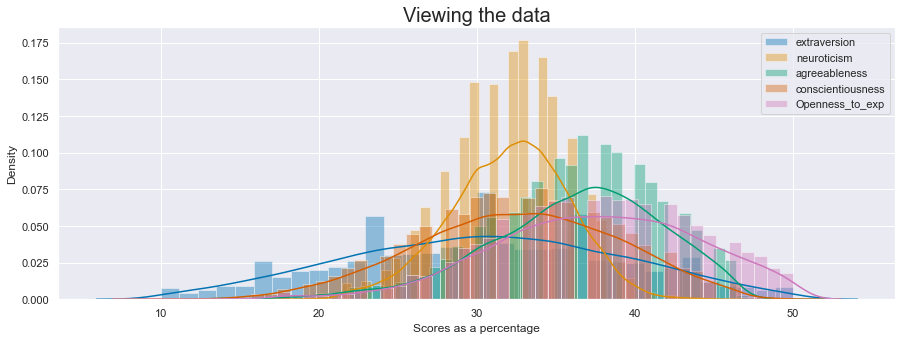

Variable: extraversion , Min value: 10.0 , Max value: 50.0
Variable: neuroticism , Min value: 14.0 , Max value: 45.0
Variable: agreeableness , Min value: 14.0 , Max value: 50.0
Variable: conscientiousness , Min value: 10.0 , Max value: 50.0
Variable: Openness_to_exp , Min value: 10.0 , Max value: 50.0


,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
count,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000
mean,30.462556,32.073461,36.238272,32.588163,37.509754
std,8.624480,3.720683,5.505762,6.357689,6.466321
min,10.000000,14.000000,14.000000,10.000000,10.000000
25%,24.000000,30.000000,33.000000,28.000000,33.000000
50%,31.000000,32.000000,37.000000,33.000000,38.000000
75%,37.000000,35.000000,40.000000,37.000000,42.000000
max,50.000000,45.000000,50.000000,50.000000,50.000000


In [8]:
# Viewing distributions
# Grouping new scores into one data frame
data = [score_card['extraversion'], score_card['neuroticism'], score_card['agreeableness'],
        score_card['conscientiousness'], score_card['Openness_to_exp']]

labs = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'Openness_to_exp']

# Create histograms on a shared axis
fig = plt.figure(figsize = (15,5))
## histograms
#plt.hist(data, 10, DisplayStyle= 'stairs', histtype = 'stepfilled', density = True, alpha = 0.5, edgecolor = 'none')
sns.distplot(data[0], label = labs[0])
sns.distplot(data[1], label = labs[1])
sns.distplot(data[2], label = labs[2])
sns.distplot(data[3], label = labs[3])
sns.distplot(data[4], label = labs[4])
plt.xlabel("Scores as a percentage")
#plt.ylabel("Frequency")
plt.title("Viewing the data", size = 20)
plt.legend()
plt.show()

# Assessing Ranges
for col in score_card:
    print("Variable:", col, ", Min value:", min(score_card[str(col)]), ", Max value:", max(score_card[str(col)]))
    
score_card.describe()

In [9]:
## Scaling data to manage outliers
scaler = StandardScaler()
score_card = pd.DataFrame(scaler.fit_transform(score_card), columns = score_card.columns)
score_card

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,1.221864,-2.707552,1.228177,1.008565,-0.233491
1,-1.676999,0.517816,-2.404554,-0.407111,0.694438
2,-1.445090,1.055378,-0.769825,-1.193598,-0.542800
3,-0.053635,0.786597,-0.588189,1.008565,0.385129
4,-0.865317,-0.288526,1.228177,0.379376,-1.316074
...,...,...,...,...,...
10504,-0.285545,-0.019745,-1.496371,-0.721706,0.075819
10505,-1.213181,-1.363648,-0.769825,-1.193598,-2.862622
10506,-0.981272,-0.557306,-0.043279,-0.092516,-2.089348
10507,-0.285545,-1.094868,-2.586191,-0.564408,0.385129


C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

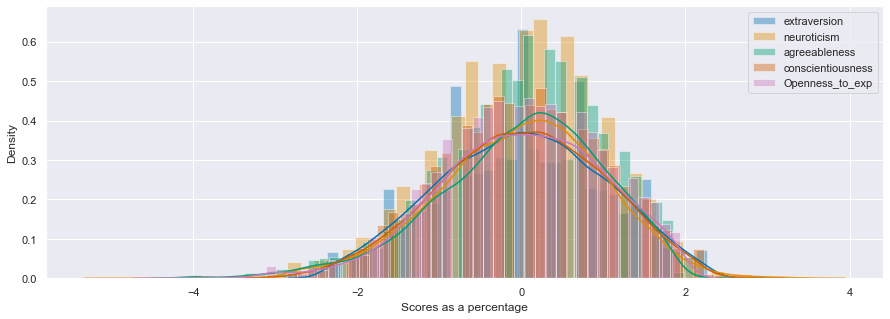

In [10]:
# Viewing distributions after standardization
# Grouping data together
data = [score_card['extraversion'], score_card['neuroticism'], score_card['agreeableness'],
        score_card['conscientiousness'], score_card['Openness_to_exp']]

labs = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'Openness_to_exp']

# Create histograms on a shared axis
fig = plt.figure(figsize = (15,5))
## histograms
#plt.hist(data, 10, DisplayStyle= 'stairs', histtype = 'stepfilled', density = True, alpha = 0.5, edgecolor = 'none')
sns.distplot(data[0], label = labs[0])
sns.distplot(data[1], label = labs[1])
sns.distplot(data[2], label = labs[2])
sns.distplot(data[3], label = labs[3])
sns.distplot(data[4], label = labs[4])
plt.xlabel("Scores as a percentage")
#plt.ylabel("Frequency")
plt.legend()
plt.show()


In [11]:
# Looking at outliers:
# z-scores less than -2.68 or more than 2.68 (1.5 times the interquartileIQR outside of the IQR )
outliers = score_card[(score_card['extraversion'] < -2.68) | ( score_card['extraversion']>2.68)|
           (score_card['neuroticism'] < -2.68) | ( score_card['neuroticism']>2.68)|
           (score_card['agreeableness'] < -2.68) | ( score_card['agreeableness']>2.68)|
           (score_card['conscientiousness'] < -2.68) | ( score_card['conscientiousness']>2.68)|
           (score_card['Openness_to_exp'] < -2.68) | ( score_card['Openness_to_exp']>2.68)]
outliers

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,1.221864,-2.707552,1.228177,1.008565,-0.233491
22,-0.169590,-1.632429,-1.859644,-0.407111,-2.707967
39,-0.053635,-0.557306,-1.133098,-0.407111,-3.017277
115,-0.169590,-1.363648,-2.949464,-1.193598,-0.697455
160,1.685683,-2.707552,1.773087,1.323160,1.467712
...,...,...,...,...,...
10422,0.062319,-2.707552,1.591450,-1.036300,0.694438
10440,-1.097226,-0.288526,-3.312737,-0.249814,1.158403
10448,0.178274,0.517816,-2.767827,-1.193598,1.622367
10499,-0.285545,-1.094868,-2.767827,-0.721706,-2.244003


In [12]:
# Proportion of outliers and their removal 
## Necessary for k-means/ k-modes, and unlikey to impact DBSCAN as the points will not be core or boundary
print(round(310/10199*100,2), "% of participants were found to contain at least one score considered to be an outlier.)")
print("These have been removed.")
score_card = score_card[(score_card['extraversion'] > -2.68) & ( score_card['extraversion'] < 2.68)&
                        (score_card['neuroticism'] > -2.68) & ( score_card['neuroticism'] < 2.68)&
                        (score_card['agreeableness'] > -2.68) & ( score_card['agreeableness'] < 2.68)&
                        (score_card['conscientiousness'] > -2.68) & ( score_card['conscientiousness'] < 2.68)&
                        (score_card['Openness_to_exp'] > -2.68) & ( score_card['Openness_to_exp'] < 2.68)]

# Resetting the index and viewing
score_card = score_card.reset_index(drop=True)
score_card.head()

3.04 % of participants were found to contain at least one score considered to be an outlier.)
These have been removed.


,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,-1.676999,0.517816,-2.404554,-0.407111,0.694438
1,-1.445090,1.055378,-0.769825,-1.193598,-0.542800
2,-0.053635,0.786597,-0.588189,1.008565,0.385129
3,-0.865317,-0.288526,1.228177,0.379376,-1.316074
4,1.453773,0.249036,1.591450,-0.249814,1.313057


C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan Rohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

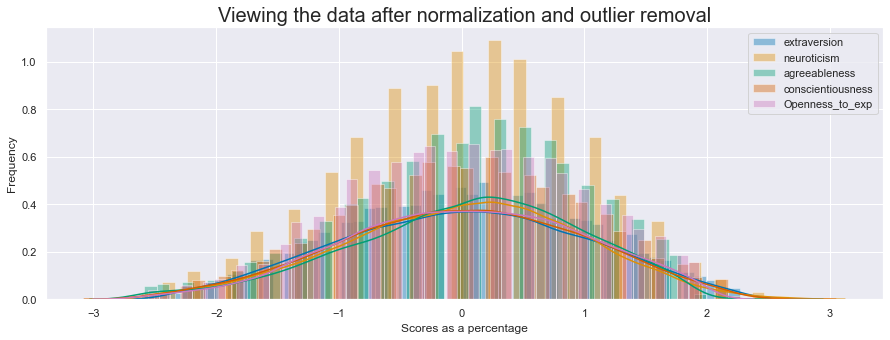

In [13]:
# Viewing distributions now that outliers have been removed
data = [score_card['extraversion'], score_card['neuroticism'], score_card['agreeableness'],
        score_card['conscientiousness'], score_card['Openness_to_exp']]

labs = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'Openness_to_exp']

# Create histograms on a shared axis
fig = plt.figure(figsize = (15,5))

## histograms
#plt.hist(data, 10, DisplayStyle= 'stairs', histtype = 'stepfilled', density = True, alpha = 0.5, edgecolor = 'none')
sns.distplot(data[0], bins = 50, label = labs[0])
sns.distplot(data[1], bins = 50, label = labs[1])
sns.distplot(data[2], bins = 50, label = labs[2])
sns.distplot(data[3], bins = 50, label = labs[3])
sns.distplot(data[4], bins = 50, label = labs[4])
plt.xlabel("Scores as a percentage")
plt.ylabel("Frequency")
plt.legend()
plt.title("Viewing the data after normalization and outlier removal", size = 20)
plt.show()


As the number of clusters are unknown and abstract, we could try meanshift clustering.
There are 50 variables, each with a possible 5 values.
The number of possible combinations represents the maximum number of possible clusters (1 cluster per unique score set):

In [14]:
5**50

88817841970012523233890533447265625

Cluster counts even remotely close to that would not be meaningful. 

There are five factors, each with values leaning towards agree, neurtal, or disagree. 
So maximum number of meaningful clusters is likely to be around:

In [15]:
3**5

243

However, we're more interested in larger groups so we can strategize around more of the customer base at once (something like 15-20 ideally).

### Data manipulation for attempt two

As it happens, because the distributions are normal and the distance between points in the datascape is so small, it is actually necessary to group them into those three categories in order to get visible clusters. It is hypothesised that the DBSCAN below is struggling to identify clusters because the dataset is representative of the whole population and not at all representative of a specific customer base where the variables would perhaps be less normally distributed (eg, the set of personalities that shop at a chemist most often probably aren't represented well by this data). 

The distributions will be divided into three groups with thresholds equal to one standard deviation from the mean:

In [16]:
# Creating a function to seperate the distributions into three parts:
def categorize_score(dataframe):
    for column in dataframe:
        for row in dataframe[column]:
            if isinstance(row, str) != str:
                if row <-1:
                    dataframe[column].replace(to_replace = row, value = "lower", inplace = True)
                elif (row >=-1) and (row <1):
                    dataframe[column].replace(to_replace = row, value = "middle", inplace = True)
                elif row > 1:
                    dataframe[column].replace(to_replace = row, value = "upper", inplace = True)
            else:
                continue
       
    return dataframe

# Seperating the distributions
attempt_two = score_card.copy()
categorize_score(attempt_two)

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,lower,middle,lower,middle,middle
1,lower,upper,middle,lower,middle
2,middle,middle,middle,upper,middle
3,middle,middle,upper,middle,lower
4,upper,middle,upper,middle,upper
...,...,...,...,...,...
10158,middle,lower,upper,upper,middle
10159,middle,middle,lower,middle,middle
10160,middle,middle,middle,middle,lower
10161,middle,lower,lower,middle,middle


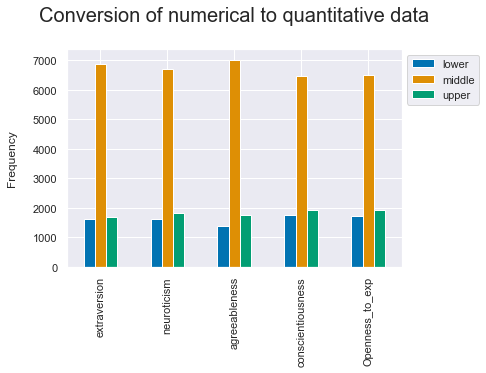

,lower,middle,upper
extraversion,1628,6864,1671
neuroticism,1631,6721,1811
agreeableness,1372,7028,1763
conscientiousness,1754,6480,1929
Openness_to_exp,1709,6520,1934


In [17]:
# Visualizing the manipulated data
counts = pd.DataFrame()
for column in attempt_two:
    counts[column] = pd.Series(attempt_two[column].value_counts())
    
counts = counts.sort_index(ascending = True).transpose()
counts.plot.bar()
plt.title("Conversion of numerical to quantitative data\n", size = 20)
plt.ylabel("Frequency\n")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Viewing numerically
counts.head()

Hopefully the above changes will distance points from eachother so clusters are more visible. (See **Attempt 2**)
### Attempt 0.5
Below it is made clear that something simple like K-means clustering is not suitable for our purposes:

In [18]:
# Reducing size of dataset for K-means clustering
## Taking random 5000 rows
sample = score_card.iloc[0:1000,:]

In [19]:
# Checking for maximum number of clusters
sample.groupby(labs, as_index=False).count()

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,-2.372726,-0.288526,-0.588189,1.323160,1.313057
1,-2.372726,1.861720,-1.859644,-1.980084,1.622367
2,-2.256772,-1.901210,-2.041281,0.379376,0.230474
3,-2.256772,-1.901210,-0.769825,1.795052,1.003748
4,-2.256772,-1.094868,-0.951462,-1.193598,0.539783
...,...,...,...,...,...
995,2.265455,-1.094868,-0.406552,-0.721706,1.158403
996,2.265455,-0.557306,-0.224915,0.693970,1.003748
997,2.265455,-0.019745,0.683267,0.536673,0.075819
998,2.265455,0.517816,1.046540,-1.665490,-1.161419


In [20]:
# Clustering with K-means on a subset to determine an optimal k
## Collecting silhouette scores and distrortion with each value of k
distortion_from_centroid = []
silhouette = []
clusters = range(1, 40) # tested on maximum range first -> range(1,998)
for k in clusters:
    model = KMeans(n_clusters = k, 
                    random_state = 42, 
                    algorithm = 'auto')
    model.fit(sample)
    distortion_from_centroid.append(model.inertia_)
    if k>2:
        labels = model.labels_
        silhouette.append(silhouette_score(sample, labels, metric = 'euclidean'))

C:\Users\Dylan Rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


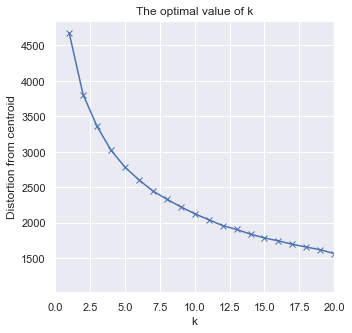

In [21]:
# Plotting elbow curve
Elbow_curve = plt.figure(figsize = (5,5))
plt.plot(clusters, distortion_from_centroid, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion from centroid')
plt.title('The optimal value of k')
#plt.ylim(2000, 12000)
plt.xlim(0,20)
#plt.scatter(10, 2100,  facecolors = 'none',  edgecolors = 'g', s = 1000, alpha = 0.2)
plt.show()

Silhouette scores are an indicator of confidence. They measure the distance between similarly clustered points and compare that to the distance of non-clustered points. The closer the score is to 1 the more confident you can be about your clusters seperation. (out-in/maxin+maxout)

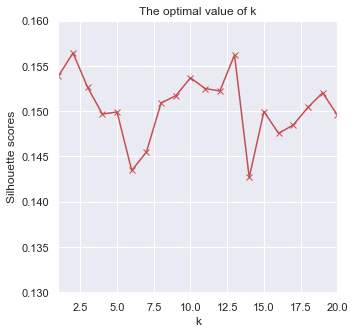

Low sillhouette scores in the meaningful range of k


In [22]:
# Plotting silhouette scores
silhouette_score_plot = plt.figure(figsize = (5,5))
plt.plot(range(1, 38), silhouette, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette scores')
plt.title('The optimal value of k')
plt.xlim(1, 20)
plt.ylim(0.130,0.160)
#plt.scatter(10, 0.153,  facecolors = 'none',  edgecolors = 'g', s = 1000)
plt.show()
print("Low sillhouette scores in the meaningful range of k")

Poor similarity between points.

### Attempt 1 - KNN + DBSCAN
Below an alternate clustering method is tested. DBSCAN algorythms can identify clusters independent of cluster shape, and filter noise well. But they can't identify clusters with differing densities, and don't do well with highly dimensional data. Knowing this, variable reduction was pre-emptively done resulting in five variables containing as much of the original information as possible. I had orginally been thinking of the datascape as a topographical map with a center peak representing the average pesonality (the mean of every distribution) which would be quite dense, surrounded by smaller peaks of lower density. While you can't change maps, you can change data. When I realised I could categorise the data to force some seperation things were far more revealing ( See attempt 2).  

Here is what was tried prior to that revelation:
For a DBSCAN, the most important hyperparameters are eps and min_samples. The eps is a distance measure indicating the distance between points, and min_samples indicates the number of samples a point needs to be touching within the eps distance to be considered part of a cluster; this is the 'density-based' aspect of the model. These are typically difficult to predict if the amount of expected clusters is unknown and the dimensionality of the data is such that it is difficult to visualize the distance. One method involves using a k-nearest neighbours algorythm, in nwhich case the k relates to min_samples and controls the degree of density while the k-distance relates to the optimal eps value and relates to the radius to consider around each point. We want to use the highest value of K (find the densest groups) that results in a reasonable amount of clusters (~10-20) with the highest silhouettte score.

**note**: 
- This KNN-DBSCAN method is common in the literature, I'm merely implementing it. 
- This process is aiming to find common customer types. The groupings are innately abstract, we're hoping for an output with a reasonable amount of clusters and a strong silhoutte score)

It is difficult to get a sense of density in a 5 dimensional space, but if we can view it in two then maybe it'll be easier to chose a value for k:

<Figure size 1440x1440 with 0 Axes>

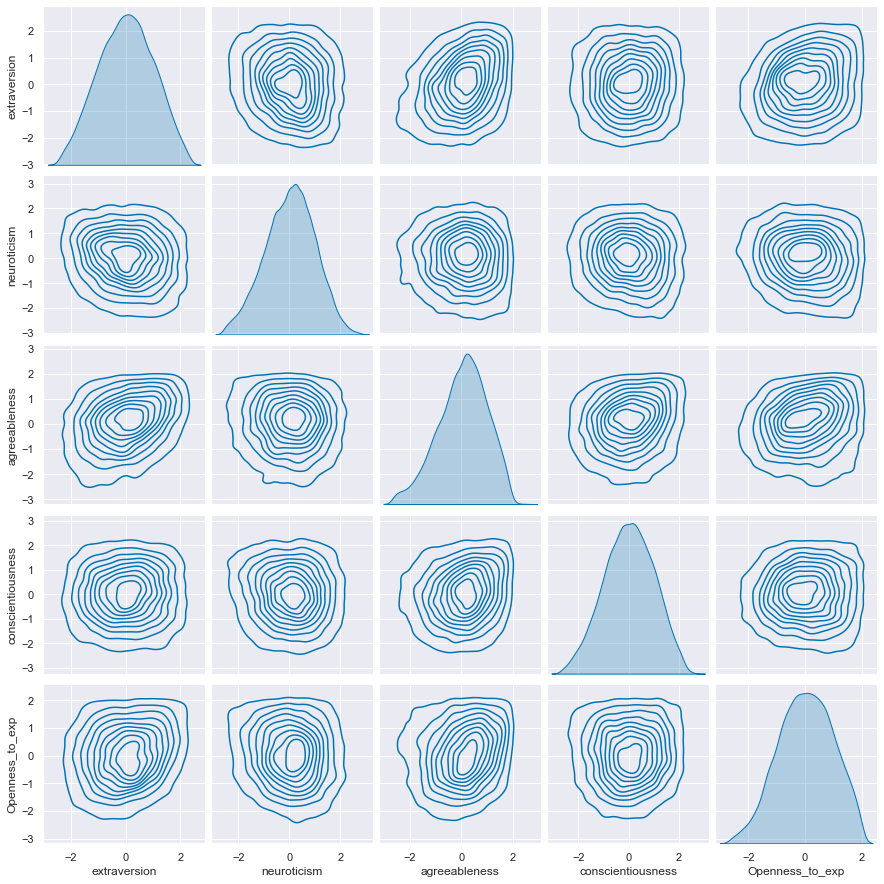

In [23]:
# Plotting variables against eachother to view granularity
pairplot_1 = plt.figure(figsize=(20,20))
sns.pairplot(score_card, kind = "kde")

The hypothesis of a large central cluster representing the average seems to be true. Unfortunately, there are few noticable globular structures. A more specific data sampling of real customers using better measures of the five factors may provide more specific insights.

In [24]:
# Using nearest neighbours model to determine the appropriate distance threshold for DBSCAN parameter 'eps' 
# as suggested in "A New Approach to Determine Eps Parameter of DBSCAN Algorithm"

# Training and fitting model while collecting diustances for DBSCAN's eps parameter
k_dist = pd.DataFrame()
for k in range(1, 200):
    # cosine similarity measures the cosine of the angle between points. Smaller angel = more similar
    knn_model = NearestNeighbors(n_neighbors = k, metric = 'cosine') 
    knn_fit = knn_model.fit(score_card)
       
    ## Finding distances
    distances, indices = knn_fit.kneighbors(score_card)
    distances = np.sort(distances, axis = 0)
    k_dist[k] = pd.Series(distances[:,0])

C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  k_dist[k] = pd.Series(distances[:,0])
C:\Users\Dylan Rohan\AppData\Local\Temp\ipykernel_9004\3172418531.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

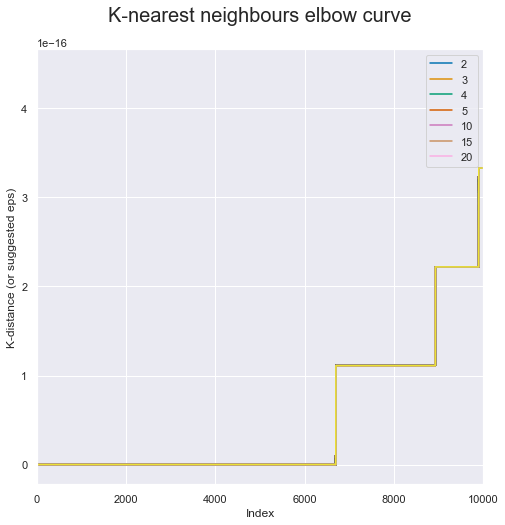

In [25]:
# Plotting k-distances
k_eps = plt.figure(figsize = (8,8))
ax1 = plt.axes()
for column in k_dist:
    plt.plot(k_dist[column])
plt.title("K-nearest neighbours elbow curve\n", size = 20)
plt.ylabel("K-distance (or suggested eps)")
plt.xlabel("Index")
plt.xlim(0, 10000)
plt.legend(labels = [2, 3, 4, 5, 10, 15, 20])
plt.show()

Notice the magnitude of K-distance. Microchanges between runs.

In [26]:
# CLustering with a DBSCAN algorythm
model = DBSCAN(eps = 0.015, min_samples = 15, 
               metric = 'cosine', # All Distance metrics have been attempted, cosine similarity seems relevant to this question
               algorithm = 'auto')

model.fit(score_card)
model.labels_

array([-1, -1, -1, ..., -1,  0, -1], dtype=int64)

In [27]:
# Applying labels to participants
db_output = score_card.copy()
db_output["cluster label"] = model.labels_

# Checking cluster sizes
db_output["cluster label"].value_counts()

-1    10108
 2       24
 1       16
 0       15
Name: cluster label, dtype: int64

In [28]:
# Checking Silhouette score
silhouette_score(db_output, db_output["cluster label"])

-0.07600895266142345

<Figure size 1440x1440 with 0 Axes>

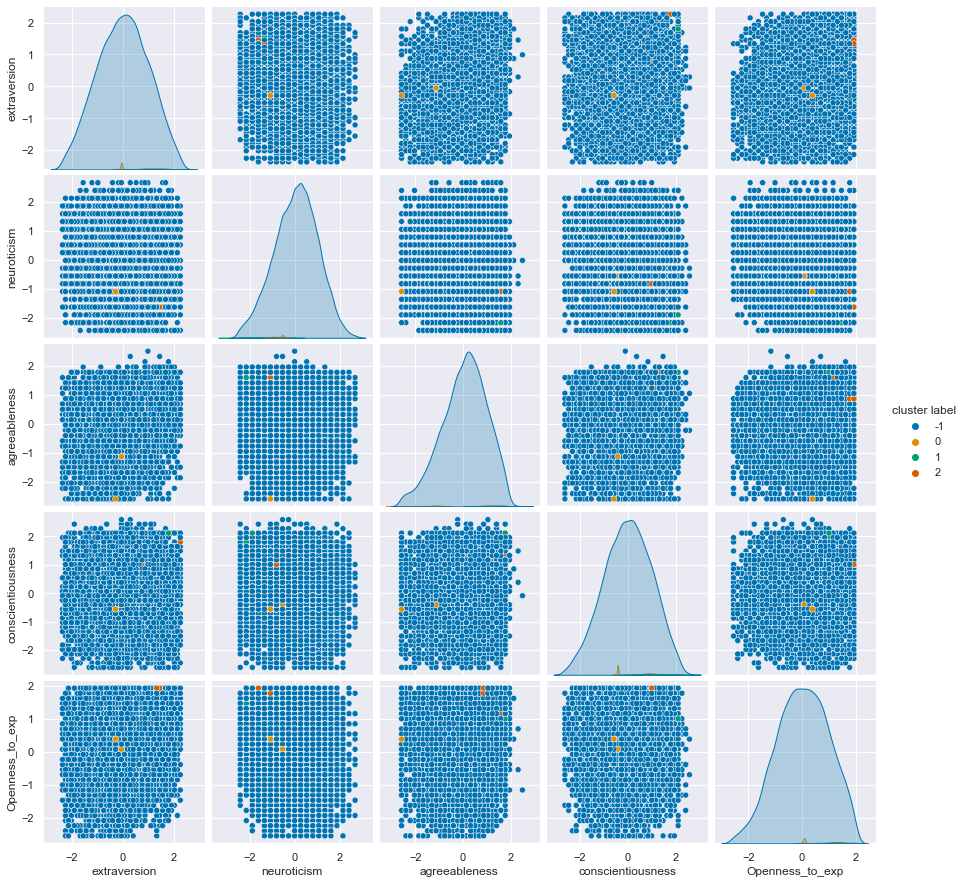

In [29]:
# Plotting variables against eachother in 2D combinations coloured by cluster assigned
plt.figure(figsize=(20,20))
sns.pairplot(db_output, hue = 'cluster label', palette = 'colorblind' )

The method outlined was to select a reasonable k and k-distance found in the k-nearest neighbours and set them equal to the eps and min_points hyperparameters in the DBSCAN algorythm. Much to my dissapointment, it was unsucceful. DBSCAN algorythms are incapable of measuring varying density clusters, so I tried categorizing the data and then assigning numerical values to that nominal data ( -1.3 -> 'lower' -> 1), essentially creating singularities with clear seperation (dense clusters). I believe it would have enabled me to find the biggest groupings in the data, which is what this was all about in the first place. But this asertion was outside the literature and beyond my comprehension. So look below for the alternative k-modes algorythm. 

### Attempt 2 - k-modes
Instead the categorized data set will be used, the datascape is far simpler now.

To get a sense of the improvement, the nominal data has been labelled numerically inorder to compare with the above pairplot. Please note that this grid is only a vizualization tool.

<Figure size 432x288 with 0 Axes>

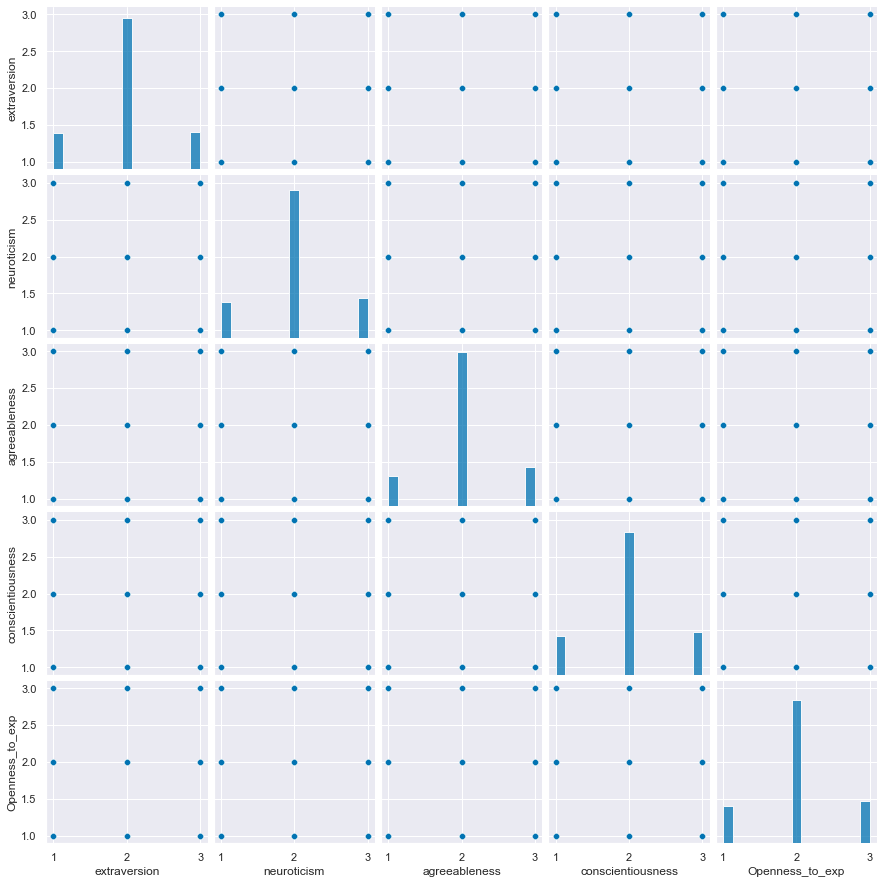

In [30]:
# Plotting the categorical variables against eachother
cheat_codes = attempt_two.copy()
for column in cheat_codes:
    cheat_codes[column].replace(to_replace = 'lower', value = 1, inplace = True)
    cheat_codes[column].replace(to_replace = 'middle', value = 2, inplace = True)
    cheat_codes[column].replace(to_replace = 'upper', value = 3, inplace = True)
     
plt.figure()
sns.pairplot(cheat_codes, palette = 'colorblind' )

In [31]:
# Checking for max number of clusters
attempt_two.groupby(labs, as_index=False).count()

,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp
0,lower,lower,lower,lower,lower
1,lower,lower,lower,lower,middle
2,lower,lower,lower,lower,upper
3,lower,lower,lower,middle,lower
4,lower,lower,lower,middle,middle
...,...,...,...,...,...
228,upper,upper,upper,middle,lower
229,upper,upper,upper,middle,middle
230,upper,upper,upper,middle,upper
231,upper,upper,upper,upper,middle


In [32]:
# using k-modes to cluster nominal data
## Assessing cost of each selection of k
cost = [] 
k_modes_clusters = range(1,25)    # range(1, 40) was tested
for k in k_modes_clusters:
    km_model = KModes(n_clusters = k, init = 'Huang', n_init = 5, verbose = 1, random_state = 42)
    km_model.fit_predict(attempt_two) 
    cost.append(km_model.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 17202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 17202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 17202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 17202.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1385, cost: 15391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15423.0
Init: initializing centroids
Init: initializing clusters
Starting iterat

Run 4, iteration: 1/100, moves: 860, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9133.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 931, cost: 8182.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2731, cost: 8263.0
Run 2, iteration: 2/100, moves: 241, cost: 8263.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2646, cost: 8515.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 210, cost: 9037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 904, cost: 8545.0
Run 5, iteration: 2/100, moves: 51, cost: 8545.0
Best run was number 1
Init: initializing centroid

Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 607, cost: 6529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1188, cost: 5628.0
Run 5, iteration: 2/100, moves: 24, cost: 5628.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1571, cost: 5821.0
Run 1, iteration: 2/100, moves: 402, cost: 5821.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 264, cost: 5856.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 750, cost: 6396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1080, cost: 5986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1641, cost: 5

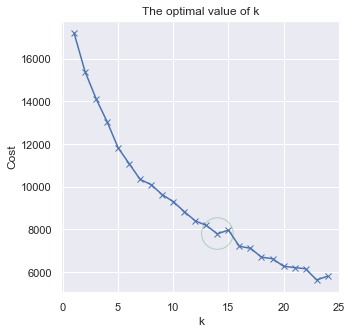

18 clusters selected as optimal


In [33]:
# Plotting elbow curve to determine optimal k
Elbow_curve = plt.figure(figsize = (5,5))
plt.plot(k_modes_clusters, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The optimal value of k')
#plt.ylim(0, 4000)
#plt.xlim(0,20)
plt.scatter(14, 7800,  facecolors = 'none',  edgecolors = 'g', s = 1000, alpha = 0.4)
plt.show()
print("18 clusters selected as optimal")

In [34]:
# Selecting model, k = 14
## The selection of k is dependent on the specific business question 
k_input = input("Please input a value of k (I used 14):")
km_model = KModes(n_clusters = int(k_input), init = 'Huang', n_init=5, verbose = 1, random_state = 42)
clusters_kmodes = km_model.fit_predict(attempt_two)

# Assigning clusters
attempt_two['cluster label'] = clusters_kmodes
attempt_two

Please input a value of k (I used 14):14
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2049, cost: 8389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2102, cost: 8215.0
Run 3, iteration: 2/100, moves: 503, cost: 8215.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 738, cost: 8384.0
Run 4, iteration: 2/100, moves: 526, cost: 8041.0
Run 4, iteration: 3/100, moves: 962, cost: 7787.0
Run 4, iteration: 4/100, moves: 345, cost: 7787.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 572, cost: 8476.0
Best run was number 4


,extraversion,neuroticism,agreeableness,conscientiousness,Openness_to_exp,cluster label
0,lower,middle,lower,middle,middle,5
1,lower,upper,middle,lower,middle,13
2,middle,middle,middle,upper,middle,10
3,middle,middle,upper,middle,lower,11
4,upper,middle,upper,middle,upper,1
...,...,...,...,...,...,...
10158,middle,lower,upper,upper,middle,3
10159,middle,middle,lower,middle,middle,0
10160,middle,middle,middle,middle,lower,11
10161,middle,lower,lower,middle,middle,0


In [35]:
# Counting instances of each cluster
print("Instances of each cluster:")
attempt_two['cluster label'].value_counts()

Instances of each cluster:


12    1566
2     1266
1     1176
4     1146
7      886
11     646
5      644
0      643
10     583
8      503
3      373
9      361
13     213
6      157
Name: cluster label, dtype: int64

We've now labelled our data in an ad hoc manner.
From here, a random forest classifier can be used to predict each cluster and measure feature importance for that cluster in order to figure out what traits are assoicated with that customer. And in this way, we can predict behaviour and cater towards that clusters key personality traits in a way that benefits them and the business.

(The code below was testing a questionable technique of my own making to estimate clusters in nominal data prior to finding k-modes algorithm). If the ascertions were accurate, it would have enabled silhouette scores to be calculates and provided an additional measure of accuracy to the clustering phase; something we have to go without in the k-modes model. I'm leaving it here in-case I ever want to play with the idea again, please scroll to next title)

Quick comparisson of clusters with another model, affintiy propogation:

### Classifier to predict whether a person belongs in a certain cluster and to determine the traits associated with that specific cluster
##### Note: one needed for each cluster

The following models have been built so you can select the cluster to make binary and predict a person is in that cluster. Then the behaviours of that cluster can be inferred based on variable importance. Initially, a random forest was used, but variable importance can't be used to determine the direction of importance, only the comparative magnitude of imporance for each variables inclusion on mean accuracy. 

Logisitics regression may well be the simplest way as the coefficients indicate their influence on probability:

In [36]:
# Making a binary for cluster X, True = 1, False = 0
binary_k3 = attempt_two.copy()
answer = input( "Please input the cluster number you'd like to predict for (I used 13): ")
binary_k3.loc[(binary_k3['cluster label'] != int(answer), 'cluster label') ] = '0'

binary_k3.loc[(binary_k3['cluster label'] == int(answer), 'cluster label')] = '1'

binary_k3.head()

# One-hot encoding predictor variables:
data = pd.get_dummies(binary_k3[labs])
data['cluster label'] = binary_k3['cluster label']

Please input the cluster number you'd like to predict for (I used 13): 13


In [37]:
# Checking data is ready for splitting
print("Checking target variable is now a binary:", binary_k3['cluster label'].unique())
data

Checking target variable is now a binary: ['0' '1']


,extraversion_lower,extraversion_middle,extraversion_upper,neuroticism_lower,neuroticism_middle,neuroticism_upper,agreeableness_lower,agreeableness_middle,agreeableness_upper,conscientiousness_lower,conscientiousness_middle,conscientiousness_upper,Openness_to_exp_lower,Openness_to_exp_middle,Openness_to_exp_upper,cluster label
0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1
2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
10159,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
10160,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
10161,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0


Rudimentary view of where cluster X can be found


<Figure size 1440x1440 with 0 Axes>

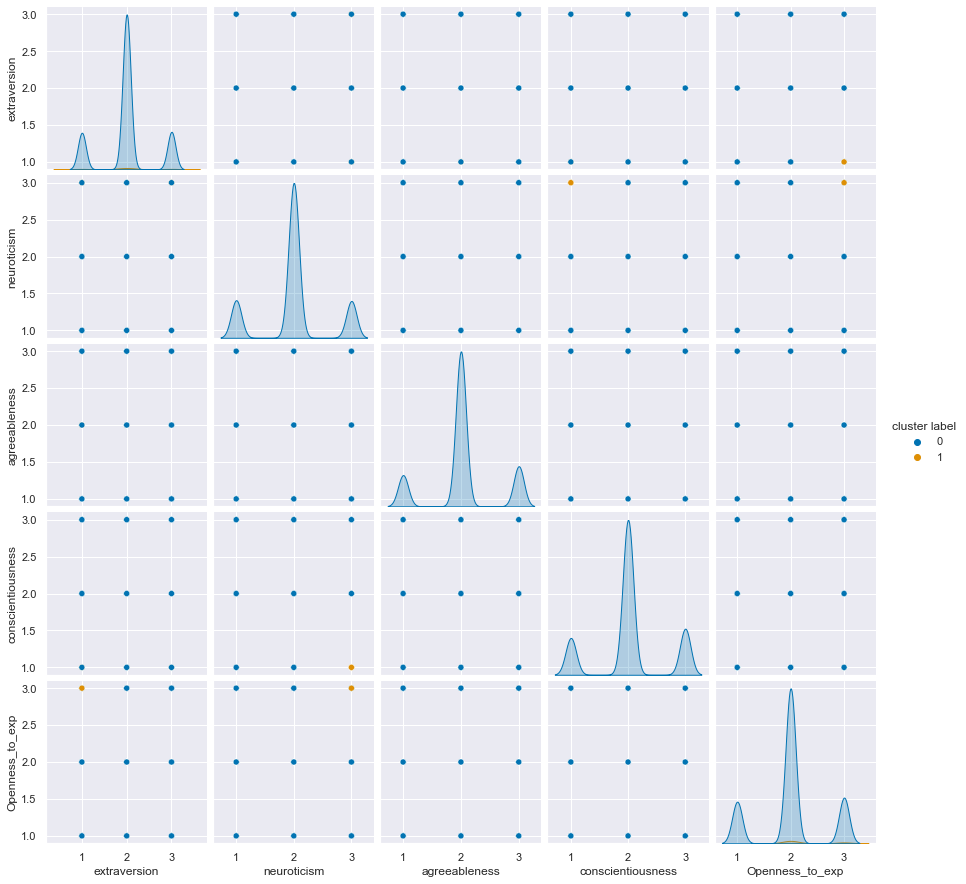

In [38]:
# Plotting variables against eachother
print("Rudimentary view of where cluster X can be found")
for column in binary_k3:
    binary_k3[column].replace(to_replace = 'lower', value = 1, inplace = True)
    binary_k3[column].replace(to_replace = 'middle', value = 2, inplace = True)
    binary_k3[column].replace(to_replace = 'upper', value = 3, inplace = True)
     
        
plt.figure(figsize=(20,20))
sns.pairplot(binary_k3, hue = 'cluster label', palette = 'colorblind' )

##### Data segregation 

In [39]:
# Splitting sample data into testing and trainning sets (80:20)
X = data.iloc[:, 0:15]
y = data.iloc[:, 15:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [40]:
# Viewing predictors in trainning set
print(X.shape)
X.head()

(10163, 15)


,extraversion_lower,extraversion_middle,extraversion_upper,neuroticism_lower,neuroticism_middle,neuroticism_upper,agreeableness_lower,agreeableness_middle,agreeableness_upper,conscientiousness_lower,conscientiousness_middle,conscientiousness_upper,Openness_to_exp_lower,Openness_to_exp_middle,Openness_to_exp_upper
0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1


In [41]:
# Viewing outcome variable in trainning set 
print(y.shape)
y.head()

(10163, 1)


,cluster label
0,0
1,1
2,0
3,0
4,0


##### Model training - Random forest

Initial attempt with random forest model; showcasing the specific reason it's not that helpful (variable importance):

In [42]:
# Constructing Random forest model
forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 15, min_samples_split = 2, 
                       min_samples_leaf = 1, bootstrap = True, oob_score = True, random_state = 42)

# Validation of model with k-folds cross validation
cv_scores_forest = cross_val_score(forest, X_train, y_train.values.ravel(), cv=5)
print("The cross validation scores were:", cv_scores_forest)
print("The average score was:", round((sum(cv_scores_forest)/5), 5 ))
print()

# Fitting model on trainning set
forest_fit = forest.fit(X_train, y_train.values.ravel())

# Testing model on test set
y_pred = forest_fit.predict(X_test)
print("Predictions:", y_pred)

The cross validation scores were: [1. 1. 1. 1. 1.]
The average score was: 1.0

Predictions: ['0' '0' '0' ... '0' '0' '0']


Text(0.5, 1.0, 'Confusion Matrix')

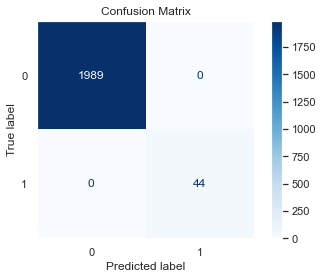

In [43]:
## Plotting Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = forest.classes_)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred,
                                                display_labels = forest.classes_,
                                                cmap = plt.get_cmap('Blues'))
plt.grid(False)
plt.title("Confusion Matrix")

In [44]:
# Checking the accuraacy score
metrics.accuracy_score(y_test, y_pred)

1.0

The ROC score is 1.0


Text(0.5, 1.0, 'ROC for the Random forest model for cluster 13')

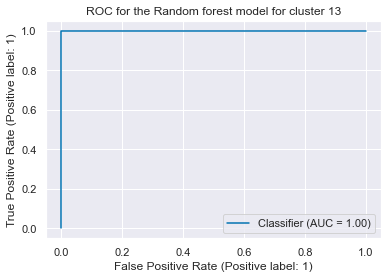

In [45]:
# Obtaing ROC AUC score and plotting ROC curve
print('The ROC score is', metrics.roc_auc_score(y_test, y_pred))
metrics.RocCurveDisplay.from_predictions(y_test.astype(int), y_pred.astype(int), pos_label = 1)
plt.title("ROC for the Random forest model for cluster 13")

##### Model Tuning

In [46]:
# Creatinga grid of hyperparameters
grid_rf = {'n_estimators': [50, 100, 200, 500],
           'max_depth': [5, 7, 9, 10, 11, 15]                                 # 15 variables after one-hot encoding
           }

# Tuning hyperparameters
tuned_rf = GridSearchCV(forest, grid_rf, cv = 5)

# Trainning Tuned model on training data
tuned_rf_fit = tuned_rf.fit(X_train, y_train.values.ravel()) 

# Obtaining optimal hyperparameters
print(tuned_rf_fit.best_params_)

{'max_depth': 5, 'n_estimators': 100}


In [47]:
# Deteriming cross fold validation scores
score_tuned_rf = cross_val_score(tuned_rf_fit, X_train, y_train.iloc[:, 0].to_numpy(), cv = 5)
print("Cross Validation scores (tuned): ", score_tuned_rf, "\nCV score = ", (sum(score_tuned_rf)/5))

Cross Validation scores (tuned):  [1. 1. 1. 1. 1.] 
CV score =  1.0


In [48]:
# Testing model on test set
y_pred = tuned_rf_fit.predict(X_test)
print("Predictions:", y_pred)

Predictions: ['0' '0' '0' ... '0' '0' '0']


Text(0.5, 1.0, 'Confusion Matrix')

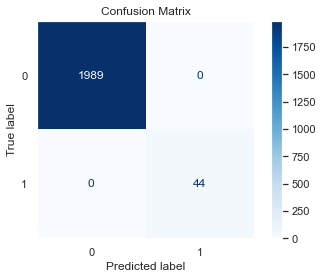

In [49]:
## Plotting Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = forest.classes_)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred,
                                                display_labels = forest.classes_,
                                                cmap = plt.get_cmap('Blues'))
plt.grid(False)
plt.title("Confusion Matrix")

In [50]:
# Obtaining accuraacy score
metrics.accuracy_score(y_test, y_pred)

1.0

The ROC AUC score is 1.0


Text(0.5, 1.0, 'ROC for the tuned Random forest model for cluster 13')

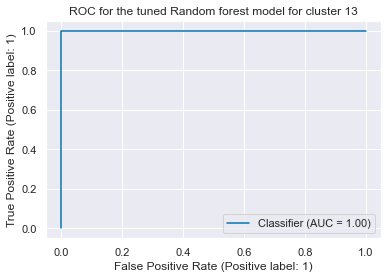

In [51]:
# Obtaining ROC AUC score and ROC curve
print('The ROC AUC score is', metrics.roc_auc_score(y_test, y_pred))
metrics.RocCurveDisplay.from_predictions(y_test.astype(int), y_pred.astype(int), pos_label = 1)
plt.title("ROC for the tuned Random forest model for cluster 13")

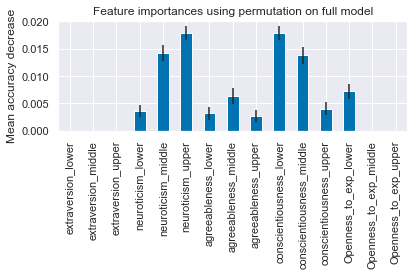

In [52]:
# Obtaining Variable Importances
result = permutation_importance(tuned_rf_fit, X_test, y_test, n_repeats = 1000, random_state = 42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index = data.iloc[:, 0:15].columns)

# Plotting importance
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


##### Model training - Logistic regression

Secondary attempt with logisitcs regression model:

In [53]:
# Constructing model
logistic = LogisticRegression(random_state = 42, max_iter = 1000)

# Trainning model on training data
logistic_fit = logistic.fit(X_train, y_train.values.ravel())

# Validation of model (k-folds CV)
cv_scores_logistic = cross_val_score(logistic, X_train, y_train.values.ravel(), cv=5)
print("The cross validation scores were:", cv_scores_logistic)
print("The average score was;", round((sum(cv_scores_logistic)/5), 5))


The cross validation scores were: [1. 1. 1. 1. 1.]
The average score was; 1.0


In [54]:
# Testing model on test data
y_pred = logistic_fit.predict(X_test)
print("Predictions", y_pred)

Predictions ['0' '0' '0' ... '0' '0' '0']


Text(0.5, 1.0, 'Confusion Matrix')

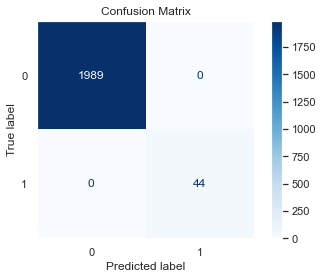

In [55]:
## Plotting Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = logistic.classes_)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred,
                                                display_labels = logistic.classes_,
                                                cmap = plt.get_cmap('Blues'))
plt.grid(False)
plt.title("Confusion Matrix")

In [56]:
# Obtaining accuracy score
metrics.accuracy_score(y_test, y_pred)

1.0

The ROC score is 1.0


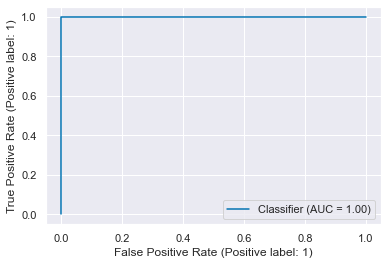

In [57]:
# Obtaining ROC AUC score and ROC curve
print('The ROC score is', metrics.roc_auc_score(y_test, y_pred,))
metrics.RocCurveDisplay.from_predictions(y_test.astype(int), y_pred.astype(int), pos_label = 1)

In [58]:
# Obtaining untuned params
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Model Tuning

In [59]:
# Tuning model
## Creating a grid of hyperparameters
grid_logistic = {'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
                 'tol' : [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
                 'C'  : [1, 0.9, 0.95, 1.1, 1.15]}
                 #'penalty' : [ 'l1', 'l2']} #a few errors as expected, l1 wasn't found to be optmal so removing for neatness

## Tuning hyperparameters
tuned_logistic = GridSearchCV(logistic, grid_logistic, cv = 5)

## Building tuned model on training data
tuned_logistic_fit = tuned_logistic.fit(X_train, y_train.values.ravel()) 
print(tuned_logistic_fit.best_params_)

## Deteriming k-fold cross validation scores
score_tuned_logistic = cross_val_score(tuned_logistic_fit, X_train, y_train.values.ravel(), cv = 5)
print("Cross Validation scores (tuned): ", score_tuned_logistic, "\nCV score = ", round((sum(score_tuned_logistic)/5), 5))

{'C': 1, 'solver': 'lbfgs', 'tol': 5e-05}
Cross Validation scores (tuned):  [1. 1. 1. 1. 1.] 
CV score =  1.0


In [60]:
# Testing on test set
y_pred = tuned_logistic_fit.predict(X_test)
print("Predictions", y_pred)

Predictions ['0' '0' '0' ... '0' '0' '0']


Text(0.5, 1.0, 'Confusion Matrix')

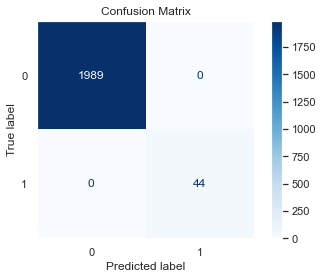

In [61]:
## Plotting Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = logistic.classes_)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred,
                                                display_labels = logistic.classes_,
                                                cmap = plt.get_cmap('Blues'))
plt.grid(False)
plt.title("Confusion Matrix")

In [62]:
# Obtaining accuraacy score
metrics.accuracy_score(y_test, y_pred)

1.0

The ROC score is 1.0


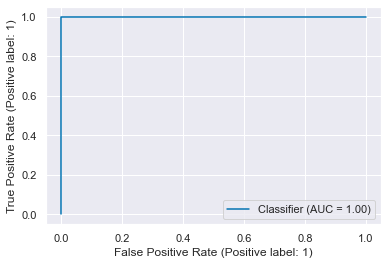

In [63]:
# Obtaining ROC AUC score and roc curve
print('The ROC score is', metrics.roc_auc_score(y_test, y_pred,))
metrics.RocCurveDisplay.from_predictions(y_test.astype(int), y_pred.astype(int), pos_label = 1)

In [64]:
# Obtaining Variable Importances
importance = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(tuned_logistic_fit.best_estimator_.coef_))], axis = 1)
importance.columns = ['variable', 'coefficient']
importance = importance.sort_values(by = ['coefficient'], axis = 0)

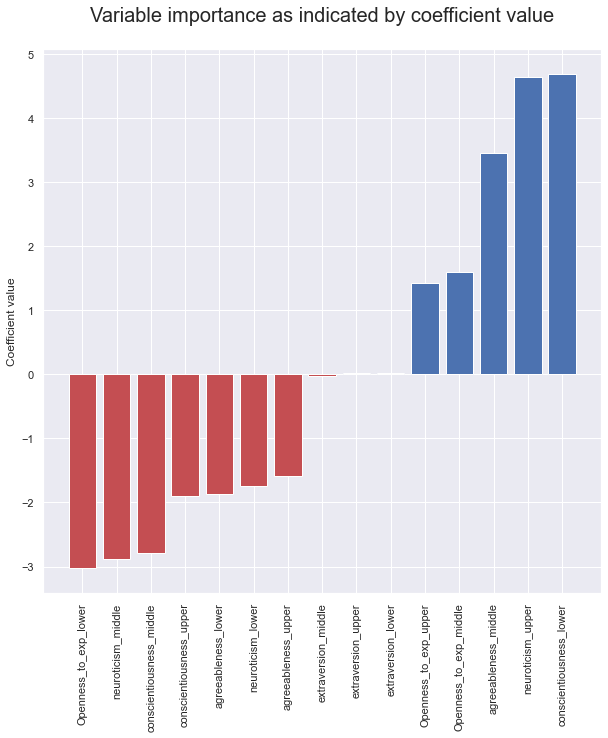

In [65]:
# Plotting importances
plt.figure(figsize=(10,10))
plt.bar(x = importance.iloc[:, 0], height = importance.iloc[:, 1], color = ['r','r','r','r','r', 'r','r','r','b', 'b', 'b', 'b', 'b', 'b', 'b'])
plt.title("Variable importance as indicated by coefficient value\n", size =20)
plt.ylabel("Coefficient value")
plt.xticks(rotation = 90)
plt.show()

Quick manipulation to see clusters identified in k-modes:

In [66]:
# Combining k-modes clusters with the initial data
initial_scores = score_card.copy()
initial_scores['assigned clusters'] = clusters_kmodes
initial_scores['assigned clusters'] = initial_scores['assigned clusters'].astype(str)
initial_scores.dtypes

extraversion         float64
neuroticism          float64
agreeableness        float64
conscientiousness    float64
Openness_to_exp      float64
assigned clusters     object
dtype: object

<Figure size 432x288 with 0 Axes>

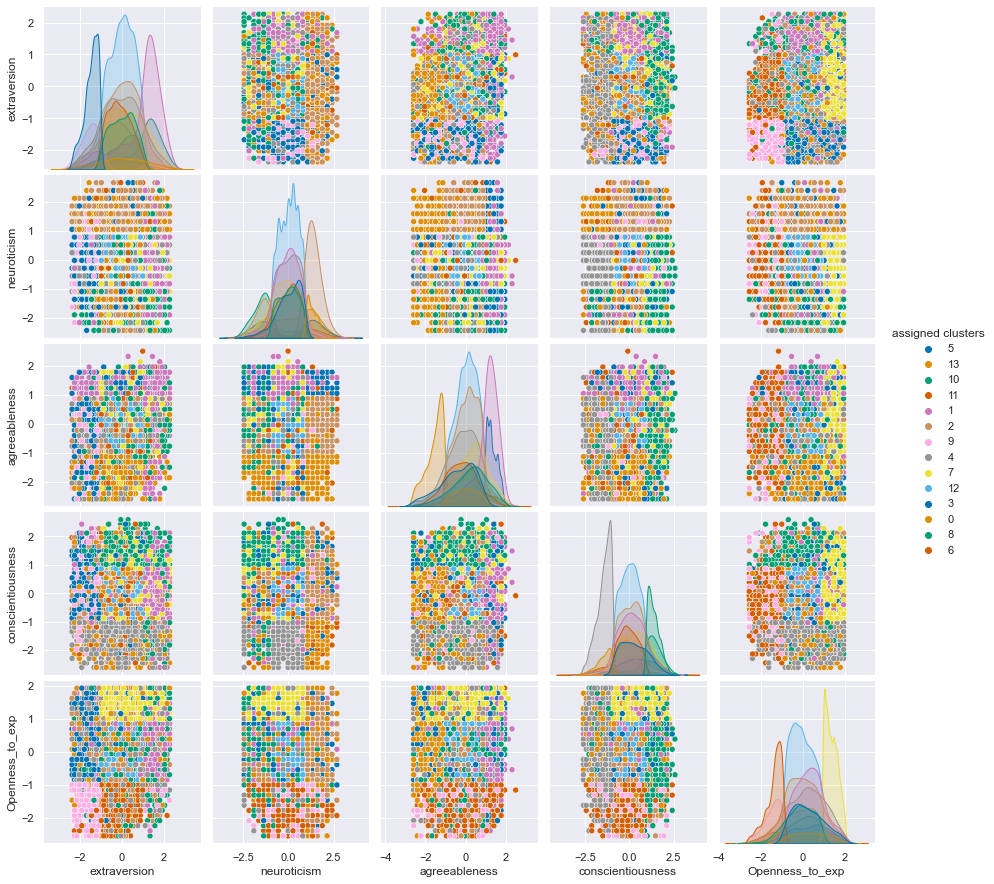

In [67]:
# Viewing clusters
plt.figure()
sns.pairplot(initial_scores, hue = 'assigned clusters', palette = 'colorblind' )

Not very clean boundaries so these models are performing quite well